INF6804 Vision par ordinateur

Polytechnique Montréal

Exemple de suivi avec Mean-shift

In [1]:
import cv2  
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

Lecture de deux images tests et affichage.

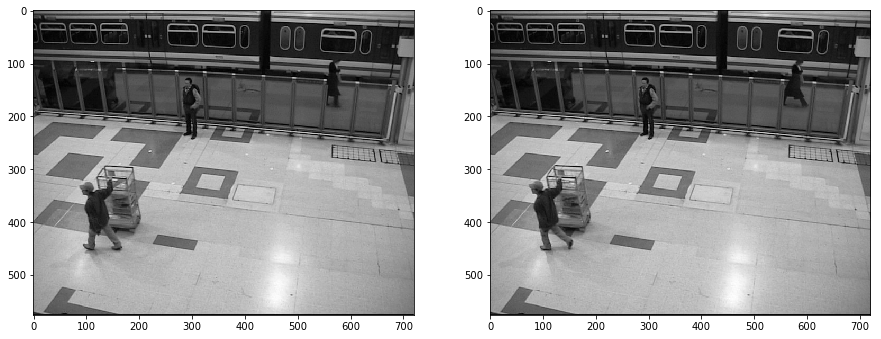

In [2]:
image1 = cv2.imread('in000216.jpg',cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('in000219.jpg',cv2.IMREAD_GRAYSCALE) 
f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(image1,cmap = plt.get_cmap('gray'))
axarr[1].imshow(image2,cmap = plt.get_cmap('gray'))
plt.show()

Définition du rectangle englobant (bbox) de la de la région d'intérêt (ROI).

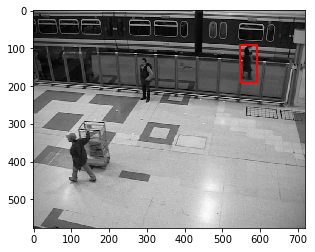

In [3]:
# Pour suivre une des trois personnes
#bbox = (279, 120, 36, 120)
#bbox = (83, 300, 70, 160)
bbox = (547, 90, 45, 100)
fig,ax = plt.subplots(1)
ax.imshow(image1,cmap = plt.get_cmap('gray'))
rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

Calcul de l'histogramme de la ROI

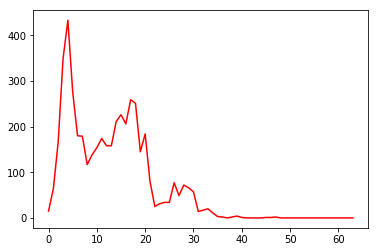

In [4]:
roi = (bbox[0], bbox[1], bbox[0]+bbox[2], bbox[1]+bbox[3])
mask = np.zeros((image1.shape[0],image1.shape[1]), np.uint8)
cv2.rectangle(mask,(roi[0],roi[1]),(roi[2],roi[3]),255,-1,8,0);
roi_hist = cv2.calcHist([image1],[0],mask,[64],[0,256])
plt.plot(roi_hist,'r')
plt.show()

Rétroprojection de l'histogramme dans la trame suivante.

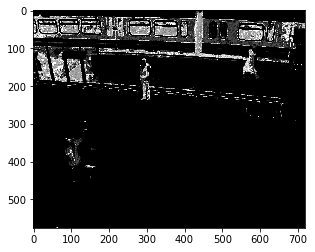

In [5]:
retro = cv2.calcBackProject([image2],[0],roi_hist,[0,64],1)
plt.imshow(retro,cmap = plt.get_cmap('gray'))
plt.show()

Application de mean-shift

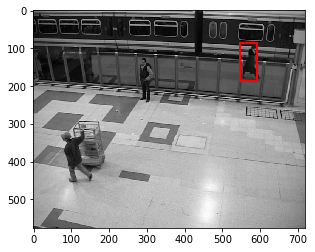

In [6]:
#nb max (10) d'itérations ou déplacement <1 pixel
crit_fin = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 ) 

iterations, bbox = cv2.meanShift(retro, bbox, crit_fin)
fig,ax = plt.subplots(1)
ax.imshow(image2,cmap = plt.get_cmap('gray'))
rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

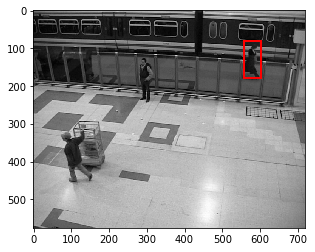

In [7]:
image3 = cv2.imread('in000222.jpg',cv2.IMREAD_GRAYSCALE) 
retro = cv2.calcBackProject([image3],[0],roi_hist,[0,64],1)
iterations, bbox = cv2.meanShift(retro, bbox, crit_fin)
fig,ax = plt.subplots(1)
ax.imshow(image2,cmap = plt.get_cmap('gray'))
rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

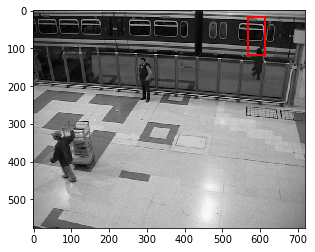

In [8]:
image4 = cv2.imread('in000225.jpg',cv2.IMREAD_GRAYSCALE) #235,227
retro = cv2.calcBackProject([image4],[0],roi_hist,[0,64],1)
iterations, bbox = cv2.meanShift(retro, bbox, crit_fin)
fig,ax = plt.subplots(1)
ax.imshow(image4,cmap = plt.get_cmap('gray'))
rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

Résultats dans l'image de la rétroprojection

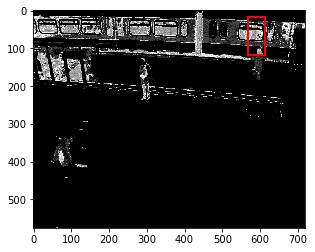

In [9]:
fig,ax = plt.subplots(1)
ax.imshow(retro,cmap = plt.get_cmap('gray'))
rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()